In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#2. 打开csv数据
with open('Data_O2_Oxidation_3.csv', encoding = 'UTF-8') as f:
    df = pd.read_csv(f)  #index_col=0 告诉第一列是索引
df
#first_column_header = df.columns[0]
#print(first_column_header)

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,C_c,BETs,AcCom,OxiStat,rpm,NaOH_c,Yld
0,3.0,97.0,0.0,46.50,20.0,10.0,120,60,0.0,Missing,Missing,Missing,400,2.0,0.019780
1,3.0,97.0,0.0,46.50,20.0,10.0,150,60,0.0,Missing,Missing,Missing,400,2.0,0.034730
2,3.0,97.0,0.0,46.50,20.0,10.0,160,60,0.0,Missing,Missing,Missing,400,2.0,0.048530
3,3.0,97.0,0.0,46.50,20.0,10.0,170,60,0.0,Missing,Missing,Missing,400,2.0,0.036800
4,3.0,97.0,0.0,46.50,20.0,10.0,200,60,0.0,Missing,Missing,Missing,400,2.0,0.034730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1.2,30.4,68.4,38.48,50.0,4.0,150,30,0.0,Missing,Missing,Missing,800,2.0,0.011905
235,1.2,30.4,68.4,38.48,50.0,4.0,150,30,1.0,21.988,CuO,2,800,2.0,0.015186
236,1.2,30.4,68.4,38.48,50.0,4.0,150,30,1.5,21.988,CuO,2,800,2.0,0.015605
237,1.2,30.4,68.4,38.48,50.0,4.0,150,30,2.0,21.988,CuO,2,800,2.0,0.015954


In [23]:
# 分割数据
df_O2_noC = df[df['C_c'] == 0]  # "C_c"列值为0的所有行   【行号不变的！】
df_O2_C = df[df['C_c'] != 0]  # "C_c"列值不为0的所有行

In [24]:
# 假设我们要删除的列是 'BETs', 'AcCom', 和 'OxiStat'
df_O2_noC = df_O2_noC.drop(['C_c', 'BETs', 'AcCom', 'OxiStat'], axis=1)

# 查看结果
df_O2_noC  #【行号不变的！】


,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,rpm,NaOH_c,Yld
0,3.0,97.0,0.0,46.50,20.0,10.0,120,60,400,2.0,0.019780
1,3.0,97.0,0.0,46.50,20.0,10.0,150,60,400,2.0,0.034730
2,3.0,97.0,0.0,46.50,20.0,10.0,160,60,400,2.0,0.048530
3,3.0,97.0,0.0,46.50,20.0,10.0,170,60,400,2.0,0.036800
4,3.0,97.0,0.0,46.50,20.0,10.0,200,60,400,2.0,0.034730
...,...,...,...,...,...,...,...,...,...,...,...
200,33.0,30.0,37.0,1.30,60.0,5.0,120,60,1045,2.0,0.001613
201,33.0,30.0,37.0,1.30,60.0,5.0,120,90,1045,2.0,0.001290
202,33.0,30.0,37.0,1.30,60.0,5.0,120,120,1045,2.0,0.001183
203,33.0,30.0,37.0,1.30,60.0,5.0,120,150,1045,2.0,0.001075


In [25]:
y = df_O2_noC.iloc[:, -1]
X = df_O2_noC.drop('Yld', axis = 1)
#X
y

0      0.019780
1      0.034730
2      0.048530
3      0.036800
4      0.034730
         ...   
200    0.001613
201    0.001290
202    0.001183
203    0.001075
234    0.011905
Name: Yld, Length: 184, dtype: float64

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 设置显示最大行数，None表示不限制显示的行数
pd.set_option('display.max_rows', None)

# 使用 MinMaxScaler 进行归一化
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,rpm,NaOH_c
0,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.111111,0.186441,0.096774,1.000000
1,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.444444,0.186441,0.096774,1.000000
2,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.186441,0.096774,1.000000
3,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.666667,0.186441,0.096774,1.000000
4,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,1.000000,0.186441,0.096774,1.000000
5,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.016949,0.096774,1.000000
6,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.084746,0.096774,1.000000
7,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.288136,0.096774,1.000000
8,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.593220,0.096774,1.000000
9,0.090909,0.988235,0.000000,0.804270,0.478261,0.315789,0.000000,0.186441,0.580645,1.000000


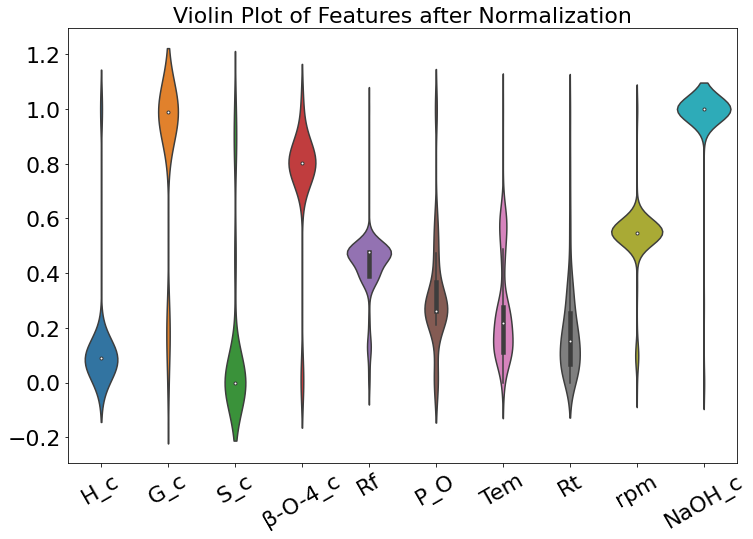

In [31]:

# 归一化后的数据与目标重新合并
df_scaled = pd.concat([X_scaled, y], axis=1)

# 绘制小提琴图
plt.figure(figsize=(12, 8))
sns.violinplot(data=X_scaled)

# 调整刻度字体大小
plt.xticks(rotation=30, fontsize=22)  # x轴刻度字体大小为12
plt.yticks(fontsize=22)  # y轴刻度字体大小为12

plt.title('Violin Plot of Features after Normalization', fontsize=22)  # 调整标题字体大小

# 保存图片
plt.savefig('violin_plot.png')  # 保存为 PNG 文件

plt.show()

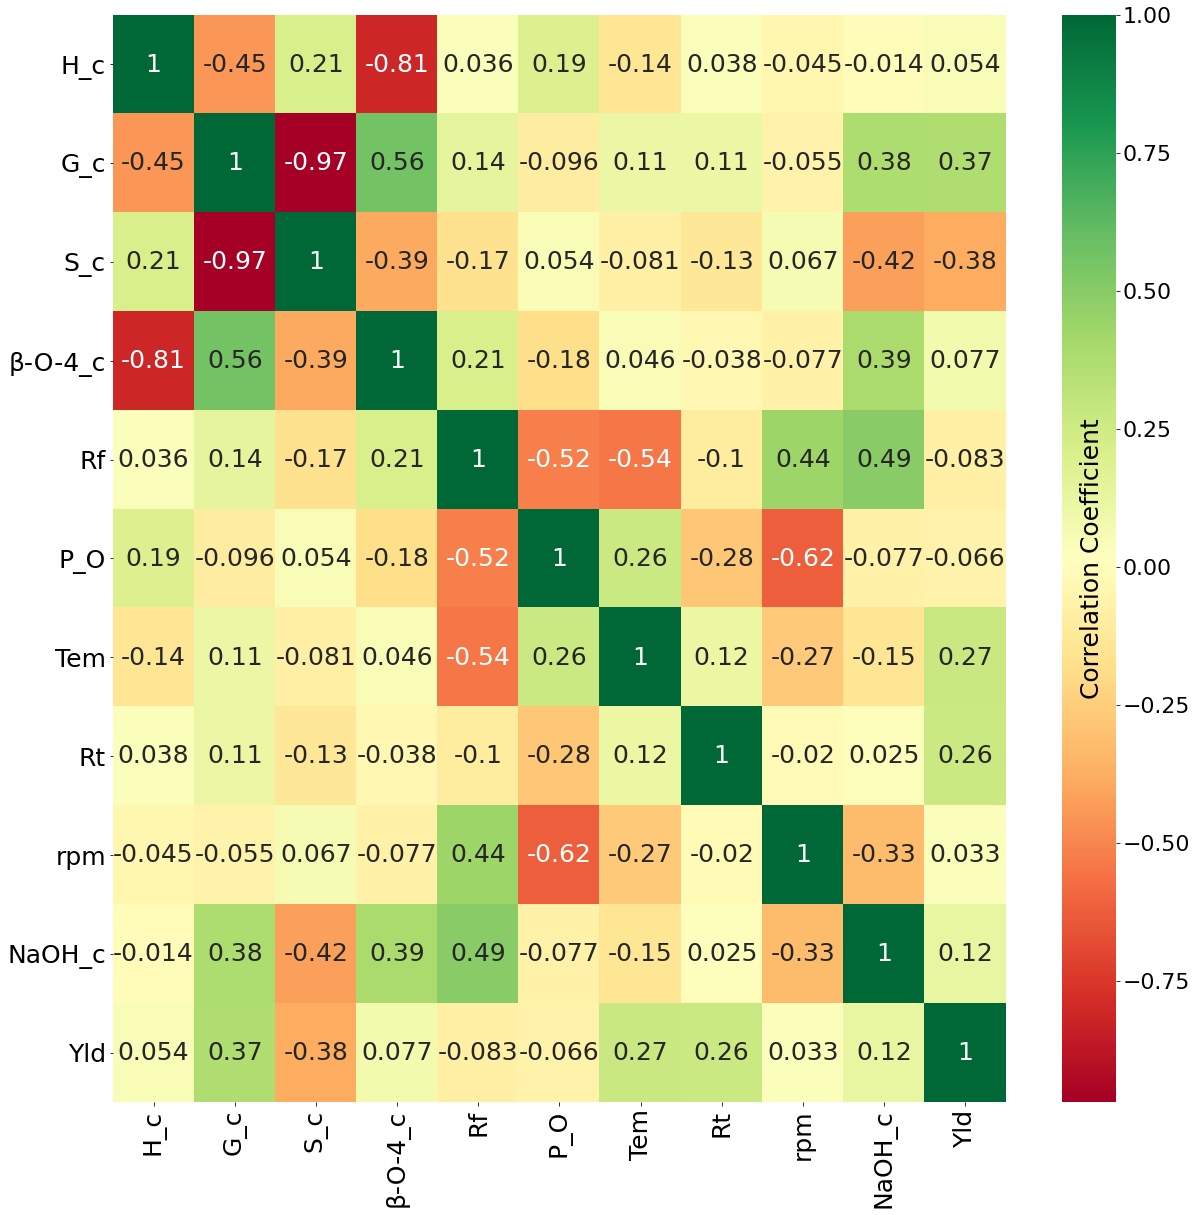

In [32]:
#2. 画热力图(未筛选描述符)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,20))

heatmap = sns.heatmap(df_scaled.corr(), 
            cmap='RdYlGn', 
            annot=True, 
            annot_kws={"size": 25},  # 调整热力图中数字字体大小
            cbar_kws={'label': 'Correlation Coefficient'})  # 可选: 增加颜色条的标签

# 调整颜色条数字字体大小
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)  # 设置颜色条刻度字体大小

# 设置颜色条标签字体居中并设置字体颜色为白色
cbar.ax.set_ylabel('Correlation Coefficient', fontsize=25, color='black', labelpad=-30)  # 字体大小，颜色，间距
cbar.ax.yaxis.set_label_position('left')  # 确保标签在颜色条的右侧
cbar.ax.yaxis.label.set_verticalalignment('center')  # 标签垂直居中

# 调整坐标轴刻度的字体大小
plt.xticks(fontsize=25, rotation=90)  # x轴字体大小和旋转角度
plt.yticks(fontsize=25, rotation=0)   # y轴字体大小


plt.savefig('热力图.tiff', dpi = 770)

In [45]:
#3.机器学习GBR
df = pd.DataFrame(X_scaled)
X = df

X

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,rpm,NaOH_c
0,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.111111,0.186441,0.096774,1.000000
1,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.444444,0.186441,0.096774,1.000000
2,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.186441,0.096774,1.000000
3,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.666667,0.186441,0.096774,1.000000
4,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,1.000000,0.186441,0.096774,1.000000
5,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.016949,0.096774,1.000000
6,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.084746,0.096774,1.000000
7,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.288136,0.096774,1.000000
8,0.090909,0.988235,0.000000,0.804270,0.130435,1.000000,0.555556,0.593220,0.096774,1.000000
9,0.090909,0.988235,0.000000,0.804270,0.478261,0.315789,0.000000,0.186441,0.580645,1.000000


training R2 = 0.924
test R2 = 0.586
RMSE(training)0.008
RMSE(test)0.015


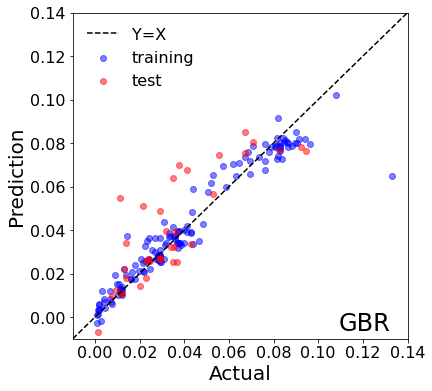

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 3)    # 把样品分为测试和验证集，用split进行分割，测试集的比例为0.2，random_state意思是随机切割、抽取

#进行梯度提升回归
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


y_pred_train_gbr = gbr.predict(X_train)
y_pred_test_gbr = gbr.predict(X_test)

#作图
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_gbr, alpha = 0.5, color = 'b', label = 'training')  #alpha设置透明度
plt.scatter(y_test, y_pred_test_gbr, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线，您可以根据需要修改颜色和线型

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.14])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.14])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'GBR', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('梯度提升回归不交叉验证.tiff', dpi = 720)

#算均方误差
from sklearn.metrics import mean_squared_error #引用均方差

print('training R2 = %.3f' %gbr.score(X_train, y_train))
print('test R2 = %.3f' %gbr.score(X_test, y_test))
rmse_tr_gbr = mean_squared_error(y_train, y_pred_train_gbr, squared = False) #squared = False 是表示对均方差求根，及得到均方根误差
rmse_te_gbr = mean_squared_error(y_test, y_pred_test_gbr, squared = False)
print('RMSE(training)%.3f'%rmse_tr_gbr)
print('RMSE(test)%.3f'%rmse_te_gbr)